In [1]:
import torch
import numpy
import pickle
from deepsvg.difflib.tensor import SVGTensor
from deepsvg.svglib.svg import SVG
from deepsvg.svglib.svg_path import SVGPath
from deepsvg.svglib.svg_primitive import SVGPathGroup, SVGRectangle
from deepsvg.svglib.geom import Bbox, Size
from deepsvg.svglib.geom import Point, Angle
import glob
import random

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from svgpathtools import Line, Path
from shapely.geometry import Polygon

# Simplifying FIGR-8 Trees

## Single example

In [2]:
path = "/home/mfeuerpfeil/master/deepsvg/dataset/figr8-tree/1002292-200.svg"
my_svg = SVG.load_svg(path)
# my_svg_simple = SVG.load_svg(path)
for path_group in my_svg:
    path_group.color = "black"
    path_group.fill = True


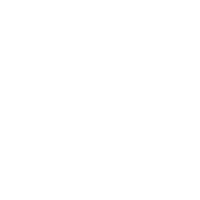

In [7]:
my_svg.animate("before_canonicalization.gif")


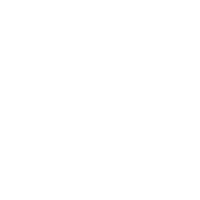

In [8]:
my_svg.copy().canonicalize_new(normalize=True).simplify_heuristic().animate("after_canonicalization.gif")

## Batch process

In [10]:
from tqdm import tqdm
import os

input_dir = "/home/mfeuerpfeil/master/deepsvg/dataset/figr8-tree/"
output_dir = "/home/mfeuerpfeil/master/deepsvg/dataset/figr8-tree-processed/"

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

for path in tqdm(glob.glob(input_dir + "*.svg")):
    my_svg = SVG.load_svg(path)
    for path_group in my_svg:
        path_group.color = "black"
        path_group.fill = True
    my_svg.canonicalize_new(normalize=True).simplify_heuristic().save_svg(output_dir + path.split("/")[-1])

100%|██████████| 5378/5378 [08:38<00:00, 10.36it/s]


# Fixing FIGR-8 with Exclusion

## render - invert - trace

## manually remove box, fill all others

In [9]:
path = "/home/mfeuerpfeil/master/deepsvg/docs/imgs/book_processed.svg"
my_svg = SVG.load_svg(path)


In [15]:
for path_group in my_svg:
    print(path_group.fill, path_group.color)

True none


In [19]:
simplified_svg = my_svg.normalize().simplify_heuristic()

Bbox(5.6074442863464355 0.037494659423828125 60.793365478515625 71.96250915527344)


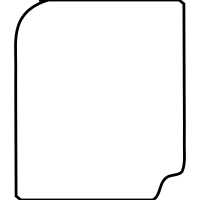

Bbox(10.462501525878906 4.125 51.41267395019531 57.86250305175781)


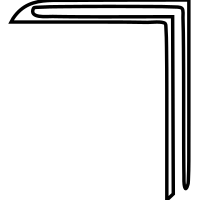

Bbox(10.125 13.125 42.5625 54.842079162597656)


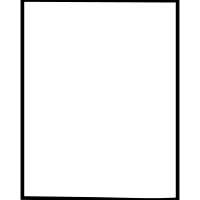

In [27]:
for x in simplified_svg.paths:
    print(x.bbox())
    x.draw(viewbox=x.bbox())

In [21]:
# the issue is the default bbox in the 
simplified_svg.animate()

In [16]:
first = True
for path_group in my_svg:
    path_group.color = "black"
    path_group.fill = True

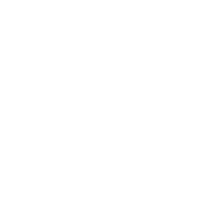

In [12]:
my_svg.zoom(0.1).draw()

In [23]:
for path_group in my_svg:
    print(path_group.fill, path_group.color)

True none
True black
True black
True black
True black
True black
True black
True black
True black
True black
True black
True black
True black


In [24]:
my_svg.save_svg("test.svg")

## test on illustrator svg

In [9]:
path = "/home/mfeuerpfeil/master/deepsvg/docs/imgs/inverted_svg_illustrator.svg"

In [16]:
my_svg = SVG.load_svg(path)
for path_group in my_svg:
    print(path_group.fill)
#     path_group.color = "black"
#     path_group.fill = True

True
True
True
True
True
True
True
True
True
True
True
True
True


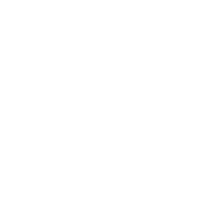

In [14]:
my_svg.draw()

In [59]:
my_svg[0].split(max_dist=1.5).path.__len__()

38

In [53]:
simplified_svg = my_svg.normalize().simplify_heuristic()

In [54]:
simplified_svg.save_svg("simplified_innverted.svg")

## full pipeline
taken from: http://catherineh.github.io/programming/2018/04/03/25-ways-of-cutting-svg-shapes

Unfortunately, this leaves each intersection with two lines. One for the entry and one for the exit.

In [28]:
from svgpathtools import parse_path, svg2paths, svgstr2paths, disvg, wsvg

def get_inverted_paths(file_path:str, stroke_width:int = 3.0, scale:float = 0.1):
    """
    Calculates the inverted svg of a given svg by iteratively subtracting each path from a rectangle.
    credit: http://www.leancrew.com/all-this/2013/03/combining-svg-paths/
    """
    paths, attributes, svg_attributes = svg2paths(file_path, return_svg_attributes=True)
    x, y, w, h = [int(x.split(".")[0]) for x in svg_attributes["viewBox"].split(" ")]
    rect_string = f'<path fill="black" fill-opacity="1.0"  filling="0" d="M{x}.0 {y}.0 L{w}.0 0.0 L{w}.0 {h}.0 L0.0 {h}.0 L0.0 0.0 Z"></path>'
    rect_paths, rect_attributes = svgstr2paths(rect_string)
    if scale is not None:
        paths = [path.scaled(0.1) for path in paths]

    processed_paths = []
    rect_path = rect_paths[0].d()#.scaled(0.3).d()
    for i, path in enumerate(paths):
        remove_path = path.d()
        processed_paths.append(parse_path(rect_path+" "+remove_path))

    return processed_paths

    # wsvg(paths = processed_paths, filename = out_path, stroke_widths=[stroke_width]*len(processed_paths))

In [315]:
paths_backup = paths

In [316]:
for i in range(1, len(paths)):
    remove_path = paths[i].d()
    current_path = paths[i-1].d()
    paths[i-1] = parse_path(current_path+" "+remove_path)

In [69]:
len(inverted_paths[0])

0

In [67]:
for path in inverted_paths:
    try:
        print(path.bbox())
    except:
        print("error")

error
(110.13405428385727, 192.0, 107.9251086815508, 192.0)
(34.6, 185.37162952526603, 34.6, 185.91273381937972)
(6.56234630459088, 157.4, 6.4341983977575925, 157.00000000000009)
(93.38543966784904, 148.89279563550025, 78.9, 148.4300860481154)
(111.4, 125.9522344786502, 120.2, 135.00000000000014)
(80.10000000000001, 95.65322254351527, 109.39328698348464, 134.0)
(121.9, 135.0, 111.10000000000001, 125.71687836487033)
(104.60000000000001, 117.0, 110.10000000000001, 125.0)
(114.10000000000001, 125.2, 103.05061728395066, 115.00000000000006)
(35.04952887948025, 81.2, 59.187536163443546, 113.9041949580338)
(98.77401270181504, 109.53822509939089, 94.10000000000001, 112.48362587836417)
(104.80000000000001, 117.0, 86.9, 105.00000000000007)
(48.91988725663453, 82.0, 73.0, 99.97001354274146)
(61.20268238033725, 115.27414363469548, 33.50075009292206, 97.26210041151906)
(88.61238425631898, 98.8924211127066, 75.63361777634945, 90.98570956636564)
(0.0, 83.61006861916367, 0.0, 81.80572194579074)
(108.4

In [71]:
file_path = "/home/mfeuerpfeil/master/deepsvg/docs/imgs/figr8.svg"
file_path = "/home/mfeuerpfeil/master/deepsvg/docs/imgs/peanut.svg"
inverted_paths = get_inverted_paths(file_path)
# print(inverted_paths)
for i, path in enumerate(inverted_paths):
    # print(len(path))
    if i == 0:
        inverted_paths[i] = Path(*inverted_paths[i][12:])
    else:
        inverted_paths[i] = Path(*inverted_paths[i][4:])
inverted_paths = [inverted_path for inverted_path in inverted_paths if len(inverted_path) >= 1]
wsvg(paths = inverted_paths, filename = "test3.svg", stroke_widths=[3.0]*len(inverted_paths))

In [324]:
idx = 2
random_stroke_widths = np.random.random(len(paths[idx:])) * 5
wsvg(paths = paths[idx:], filename = "test.svg", stroke_widths=random_stroke_widths.tolist())

In [322]:
random_stroke_widths.tolist()

[3.4912755686443604,
 1.7727687537370829,
 3.5868906150311464,
 1.3781259852032313,
 1.5990805880146057,
 1.1238202772592905,
 3.236377739112275,
 1.4740627577788383,
 1.801644900765425,
 1.9531559766844175,
 4.586644713214057,
 3.267679265473276,
 4.647775990880444,
 0.876464009819784]

In [287]:
current_paths = []
for i, path in enumerate(paths[:1]):
    remove_path = path.d()
    current_paths.append(parse_path(rect_paths[0].d()+" "+remove_path))

In [288]:
wsvg(paths = current_paths, filename = "test.svg", stroke_widths=[4.0]*len(current_paths))

In [278]:
idx = 11
wsvg(paths = current_path[idx:], filename = "test.svg", stroke_widths=[4.0]*len(current_path[idx:]))

## optimizing

In [267]:
for i, path in enumerate(paths):
    single_deletion = parse_path(rect_paths[0].d()+" "+path.d())
    wsvg(paths = single_deletion, filename=f"docs/imgs/deletions/{i}.svg")

## alternative

In [268]:
from svgpathtools import Line, Path
from shapely.geometry import Polygon
from math import ceil

minimum_stitch = 1

def path_difference_shapely(path1, path2):
    # convert both paths to polygons
    def path_to_poly(inpath):
        points = []
        for path in inpath:
            if isinstance(path, Line):
                points.append([path.end.real, path.end.imag])
            else:
                num_segments = ceil(path.length() / minimum_stitch)
                for seg_i in range(int(num_segments + 1)):
                    points.append([path.point(seg_i / num_segments).real,
                                    path.point(seg_i / num_segments).imag])
        return Polygon(points)
    poly1 = path_to_poly(path1)
    poly2 = path_to_poly(path2)
    diff_poly = poly1.difference(poly2)
    points = diff_poly.exterior.coords
    new_path = []
    for i in range(len(points)-1):
        new_path.append(Line(start=points[i-1][0]+points[i-1][1]*1j,
                             end=points[i][0]+points[i][1]*1j))
    new_path.append(Line(start=points[-1][0]+points[-1][1]*1j,
                             end=points[0][0]+points[0][1]*1j))
    # make a new path from these points
    return Path(*new_path)

(0.0, 1920.0, 0.0, 1920.0)

In [152]:
import svgwrite
# Create a new SVG document
file_path = "/home/mfeuerpfeil/master/deepsvg/docs/imgs/figr8.svg"
dwg = svgwrite.Drawing(file_path)

# Define a black-filled rectangle that covers the entire canvas
dwg.add(dwg.rect(insert=(0, 0), size=("100%", "100%"), fill="black"))

dwg.filename = "test.svg"
# Save the SVG to a file
dwg.save()

In [146]:
from svgpathtools import svg2paths, wsvg, Path, Line
import svgwrite

# Load the SVG file
file_path = "/home/mfeuerpfeil/master/deepsvg/docs/imgs/figr8.svg"
paths, attributes, svg_attributes = svg2paths(file_path, return_svg_attributes=True)

w = int(svg_attributes["width"].split(".")[0])
h = int(svg_attributes["height"].split(".")[0])

# # Define a rectangle
rectangle = Path(rect=[(0, 0), (w, 0), (w, h), (0, h)], is_closed=True)

# # Set the fill color to black
rectangle.stroke = svgwrite.rgb(0, 0, 0, '%')

# # Append the rectangle to the existing paths
paths.append(rectangle)

# # Save the modified SVG back to a file
output_file = "test.svg"
wsvg(paths, attributes=attributes, filename=output_file)

ValueError: not enough values to unpack (expected 4, got 0)

In [149]:
rectangle = Path([(0, 0), (w, 0), (w, h), (0, h)], is_closed=True)
rectangle

AttributeError: 'list' object has no attribute 'start'

In [2]:
my_svg = SVG.load_svg("/home/mfeuerpfeil/master/deepsvg/docs/imgs/figr8.svg")

In [3]:
my_svg.normalize()

SVG[Bbox(0.0 0.0 72.0 72.0)](
	SVGPathGroup(SVGPath(M[P(0.0, 0.0), P(0.0, 360.0)] L[P(0.0, 360.0), P(0.0, 0.0)] L[P(0.0, 0.0), P(360.0, 0.0)] L[P(360.0, 0.0), P(720.0, 0.0)] L[P(720.0, 0.0), P(720.0, 360.0)] L[P(720.0, 360.0), P(720.0, 720.0)] L[P(720.0, 720.0), P(360.0, 720.0)] L[P(360.0, 720.0), P(0.0, 720.0)] L[P(0.0, 720.0), P(0.0, 360.0)] Z[P(0.0, 360.0), P(0.0, 360.0)]), SVGPath(M[P(0.0, 360.0), P(317.625, 654.375)] C[P(317.625, 654.375), P(318.375, 648.375), P(313.125, 618.0), P(306.375, 586.875)] L[P(306.375, 586.875), P(294.375, 530.625)] L[P(294.375, 530.625), P(272.25, 523.5)] C[P(272.25, 523.5), P(241.125, 513.75), P(213.0, 485.625), P(204.375, 456.0)] C[P(204.375, 456.0), P(201.0, 444.75), P(196.875, 434.25), P(195.375, 433.125)] C[P(195.375, 433.125), P(193.5, 432.375), P(165.0, 425.25), P(131.625, 417.75)] C[P(131.625, 417.75), P(65.625, 402.75), P(60.0, 403.5), P(60.0, 423.75)] C[P(60.0, 423.75), P(60.0, 451.125), P(72.0, 495.0), P(88.5, 528.75)] C[P(88.5, 528.75), P(11

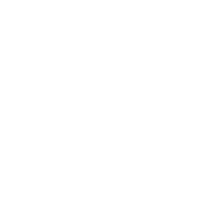

In [4]:
my_svg.draw(fill=True)

In [92]:
my_svg.to_str()

'<svg xmlns="http://www.w3.org/2000/svg" viewBox="0.0 0.0 192.0 192.0" height="200px" width="200px"><path fill="none" fill-opacity="1.0"  filling="0" d="M0.0 960.0 L0.0 0.0 L960.0 0.0 L1920.0 0.0 L1920.0 960.0 L1920.0 1920.0 L960.0 1920.0 L0.0 1920.0 L0.0 960.0 Z M847.0 1745.0 C849.0 1729.0 835.0 1648.0 817.0 1565.0 L785.0 1415.0 L726.0 1396.0 C643.0 1370.0 568.0 1295.0 545.0 1216.0 C536.0 1186.0 525.0 1158.0 521.0 1155.0 C516.0 1153.0 440.0 1134.0 351.0 1114.0 C175.0 1074.0 160.0 1076.0 160.0 1130.0 C160.0 1203.0 192.0 1320.0 236.0 1410.0 C311.0 1561.0 451.0 1687.0 606.0 1741.0 C686.0 1769.0 736.0 1779.0 795.0 1777.0 C843.0 1775.0 845.0 1774.0 847.0 1745.0 Z M1544.0 1685.0 C1642.0 1620.0 1755.0 1484.0 1748.0 1438.0 C1745.0 1415.0 1744.0 1415.0 1595.0 1415.0 L1445.0 1415.0 L1442.0 1555.0 C1441.0 1631.0 1442.0 1700.0 1444.0 1707.0 C1453.0 1729.0 1490.0 1721.0 1544.0 1685.0 Z M1266.0 1439.0 C1336.0 1413.0 1444.0 1309.0 1480.0 1235.0 C1500.0 1194.0 1505.0 1169.0 1505.0 1095.0 C1505.0 1012

In [97]:
my_svg.bbox()

AttributeError: 'Bbox' object has no attribute 'x'

In [107]:
my_svg.bbox().wh.x

1920.0

In [127]:
x = my_svg.bbox().xy.x
y = my_svg.bbox().xy.y
w = my_svg.bbox().wh.x
h = my_svg.bbox().wh.y

my_rect = SVGRectangle(Point(x,y), 
                       Point(w,h), 
                       fill=True,
                       stroke_width="5.0",
                       opacity=.2)

merged = SVG([my_rect.to_path()] + my_svg.svg_path_groups, viewbox = my_svg.bbox())

In [129]:
merged.save_svg("test.svg")

In [161]:
my_rect.to_path().to_str()

'<path fill="black" fill-opacity="1.0"  filling="0" d="M0.0 0.0 L1920.0 0.0 L1920.0 1920.0 L0.0 1920.0 L0.0 0.0 Z"></path>'

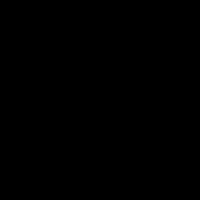

In [128]:
merged.draw()

In [109]:
my_rect.to_str()

'<rect fill="black" fill-opacity="1.0" x="0.0" y="0.0" width="1920.0" height="1920.0"/>'

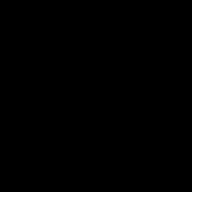

In [110]:
my_rect.draw()

In [39]:
my_rect.to_path()

SVGPathGroup(SVGPath(M[P(0.0, 0.0), P(96.0, 96.0)] L[P(96.0, 96.0), P(192.0, 96.0)] L[P(192.0, 96.0), P(192.0, 192.0)] L[P(192.0, 192.0), P(96.0, 192.0)] L[P(96.0, 192.0), P(96.0, 96.0)] Z[P(96.0, 96.0), P(96.0, 96.0)]))

# test loading of svgs

In [5]:
svg_file = "/scratch2/moritz_data/openmoji_black_svg/emoji/1F91A-1F3FE.svg"
mysvg = SVG.load_svg(svg_file)

In [55]:
from moviepy.video.VideoClip import ImageClip
clips, svg_commands = [], []
color="grey"
for svg_path in mysvg.paths:
    clips, svg_commands = svg_path.to_video(lambda img: ImageClip(img).set_duration(0.1), clips, svg_commands, color=color)
    break

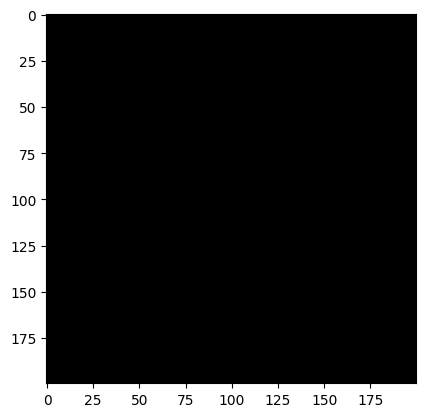

In [62]:
plt.imshow(clips[12].img)

In [107]:
svg_file = "/scratch2/moritz_data/openmoji_black_svg/emoji/1F91A-1F3FE.svg"
icon = SVG.load_svg(svg_file).normalize(Bbox(64))
icon = icon.simplify_heuristic(epsilon=0.001)                                 # path simplifcation
icon.zoom(.9)#.translate(Point(0, 5)).rotate(Angle(15))  # scale, translate, rotate
icon.draw()
# icon.save_svg("test.svg")

before modification viewbox: Size(72.0, 72.0)
scale factor:  0.8888889


TypeError: simplify_heuristic() got an unexpected keyword argument 'epsilon'

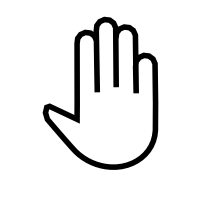

In [106]:
tolerance=111110.1
epsilon = 0.0001
angle_threshold = 111111111
force_smooth=False

mysvg.copy().split(max_dist=2, include_lines=False) \
            .simplify(tolerance=tolerance, epsilon=epsilon, angle_threshold=angle_threshold, force_smooth=force_smooth) \
            .split(max_dist=7.5).draw()

In [95]:
list(mysvg.paths)

[SVGPath(M[P(0.0, 0.0), P(41.765899658203125, 13.737500190734863)] C[P(41.765899658203125, 13.737500190734863), P(41.48189926147461, 11.808199882507324), P(42.815799713134766, 10.013900756835938), P(44.74509811401367, 9.729999542236328)] C[P(44.74509811401367, 9.729999542236328), P(46.67439651489258, 9.445999145507812), P(48.46869659423828, 10.779799461364746), P(48.75259780883789, 12.709199905395508)] C[P(48.75259780883789, 12.709199905395508), P(48.798099517822266, 13.018500328063965), P(48.802398681640625, 13.33240032196045), P(48.76519775390625, 13.642800331115723)] L[P(48.76519775390625, 13.642800331115723), P(49.02229690551758, 32.6411018371582)] L[P(49.02229690551758, 32.6411018371582), P(49.01749801635742, 33.592403411865234)] L[P(49.01749801635742, 33.592403411865234), P(48.82469940185547, 23.96710205078125)] C[P(48.82469940185547, 23.96710205078125), P(48.54069900512695, 22.03780174255371), P(49.87459945678711, 20.243501663208008), P(51.803897857666016, 19.95960235595703)] C[

In [87]:
svg2 = mysvg.copy().split(max_dist=2, include_lines=True)
len(svg2.svg_path_groups[0][0]), len(mysvg.svg_path_groups[0][0])

(148, 31)

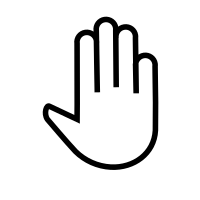

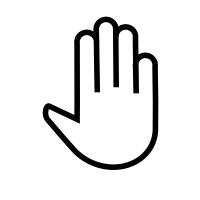

In [74]:
mysvg.draw()#.normalize().zoom(1.2).animate()
mysvg.copy().split(max_dist = 1).draw()

SVGPath(M[P(0.0, 0.0), P(19.678300857543945, 20.0)] L[P(19.678300857543945, 20.0), P(14.55943489074707, 20.0)] L[P(14.55943489074707, 20.0), P(9.440567016601562, 20.0)] L[P(9.440567016601562, 20.0), P(4.321699619293213, 20.0)] C[P(4.321699619293213, 20.0), P(4.214466571807861, 19.89276695251465), P(4.107233047485352, 19.785533905029297), P(4.0, 19.678300857543945)] L[P(4.0, 19.678300857543945), P(4.0, 14.55943489074707)] L[P(4.0, 14.55943489074707), P(4.0, 9.440567016601562)] L[P(4.0, 9.440567016601562), P(4.0, 4.321699619293213)] C[P(4.0, 4.321699619293213), P(4.107233047485352, 4.214466571807861), P(4.214466571807861, 4.107233047485352), P(4.321699619293213, 4.0)] L[P(4.321699619293213, 4.0), P(9.440567016601562, 4.0)] L[P(9.440567016601562, 4.0), P(14.55943489074707, 4.0)] L[P(14.55943489074707, 4.0), P(19.678300857543945, 4.0)] C[P(19.678300857543945, 4.0), P(19.785533905029297, 4.107233047485352), P(19.89276695251465, 4.214466571807861), P(20.0, 4.321699619293213)] L[P(20.0, 4.321

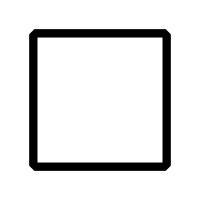

SVGPath(M[P(19.678300857543945, 20.0), P(10.036600112915039, 15.668266296386719)] L[P(10.036600112915039, 15.668266296386719), P(10.036600112915039, 8.334932327270508)] L[P(10.036600112915039, 8.334932327270508), P(12.832900047302246, 8.334932327270508)] C[P(12.832900047302246, 8.334932327270508), P(13.62836742401123, 8.664438247680664), P(14.329865455627441, 9.365983009338379), P(14.659334182739258, 10.161465644836426)] L[P(14.659334182739258, 10.161465644836426), P(14.659334182739258, 10.161465644836426)] C[P(14.659334182739258, 10.161465644836426), P(14.329863548278809, 10.95692253112793), P(13.62835693359375, 11.658429145812988), P(12.832900047302246, 11.987899780273438)] L[P(12.832900047302246, 11.987899780273438), P(10.036599159240723, 11.987899780273438)])


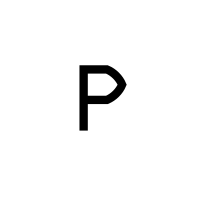

In [8]:
for x in icon.paths:
    print(x)
    x.draw()

# plot tensors

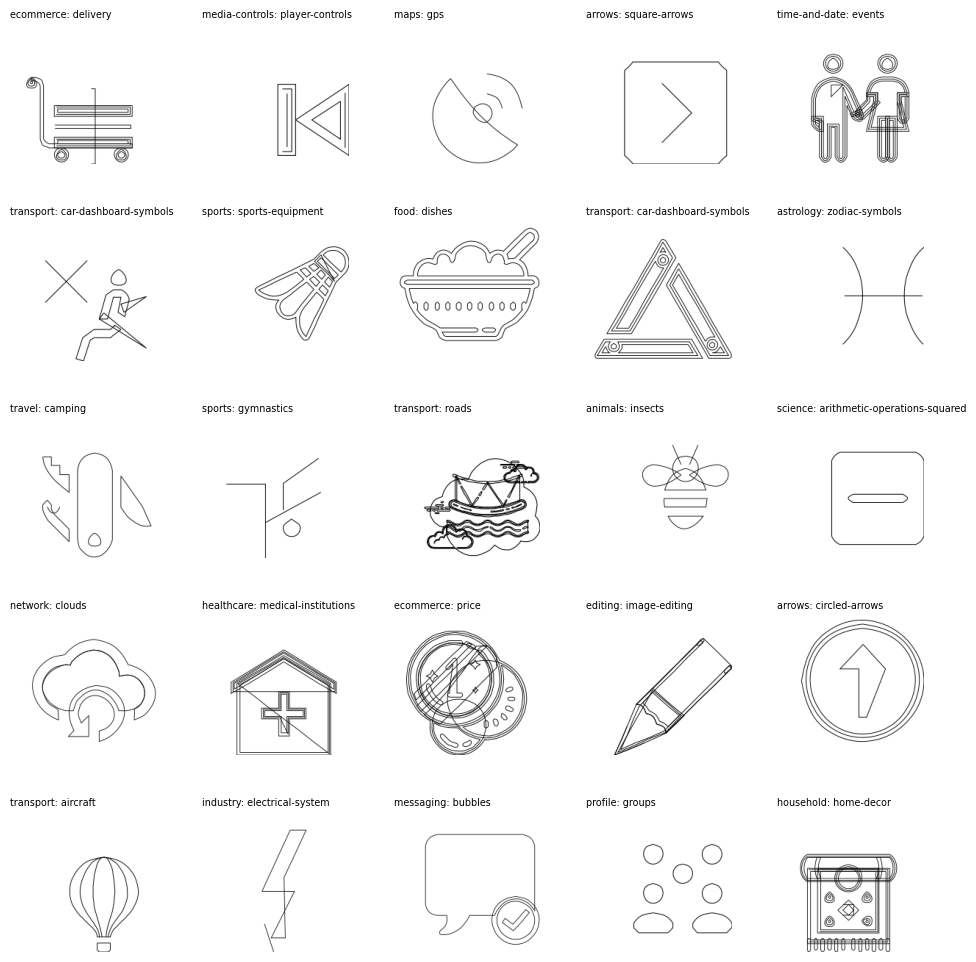

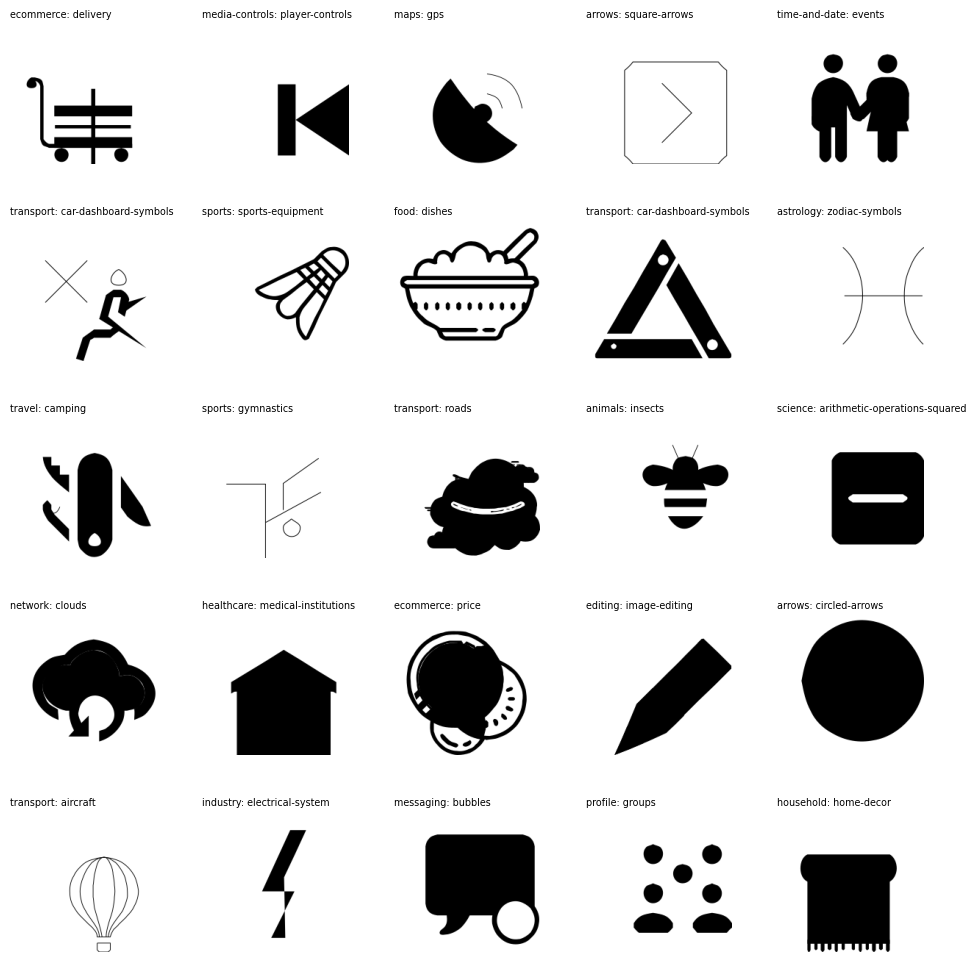

In [103]:
def pkl_to_svg(pkl_path:str = "/home/mfeuerpfeil/master/deepsvg/dataset/icons_tensor/99275.pkl", fill=True):
    with open(pkl_path, "rb") as f:
        loaded = pickle.load(f)
    
    idx = 0

    maximus = 0
    for x in loaded["tensors"][idx]:
        if x.max() > maximus:
            maximus=x.max().item()
    # print(loaded["fillings"])
    if(fill):
        fill_list = loaded["fillings"]
    else:
        fill_list = [0 for x in loaded["fillings"]]
    
    my_svg = SVG.from_tensors(loaded["tensors"][0], fill_list=fill_list, viewbox=Bbox(maximus))

    return my_svg

def draw_svg(idx:int, fill=True):
    files = glob.glob("/home/mfeuerpfeil/master/deepsvg/dataset/icons_tensor/*.pkl")
    # random.seed(421)
    # random_sample = random.sample(files, 1)[0]
    if idx > len(files)-1:
        idx = 0
    random_sample = files[idx]
    data_id = int(random_sample.split("/")[-1].replace(".pkl", ""))
    # print(data_id)
    random_svg = pkl_to_svg(random_sample, fill=fill)
    # print(random_svg.svg_path_groups[0].color)
    # print(random_svg.to_str())
    return random_svg.draw(return_png=True, do_display=False), data_id
    # my_svg.save_png("test.png")

def draw_25_images(image_index_tuples, context_df):
    # Generate 25 random images for demonstration
    # images = np.random.rand(25, 32, 32)  # Replace with your actual images
    images = [x[0] for x in image_index_tuples]
    idxs = [x[1] for x in image_index_tuples]

    # Create a figure and subplots
    fig, axes = plt.subplots(5, 5, figsize=(10, 10))

    # Iterate over the subplots and images to display
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i], cmap='gray')  # Replace 'gray' with the desired colormap
        instance = df[df["id"] == idxs[i]]
        display_text = instance.category.values[0] + ": " + instance.subcategory.values[0]
        ax.text(x=0, y=0,s=display_text, fontsize='x-small')
        ax.axis('off')

    # Adjust spacing between subplots
    plt.tight_layout()

    # Display the plot
    plt.show()

# start = 275
start = 111

df = pd.read_csv("/home/mfeuerpfeil/master/deepsvg/dataset/icons_meta.csv")

# category = "emoji"

# df = df[df["category"] == category]#.reset_index(drop=True)

my_idx = df.id

start_idx = my_idx.iloc[start]
end_idx = start_idx + 25

image_index_tuples = [draw_svg(i,fill=False) for i in range(start_idx,end_idx)]
image_index_tuples_fill = [draw_svg(i,fill=True) for i in range(start_idx,end_idx)]
draw_25_images(image_index_tuples, df)
draw_25_images(image_index_tuples_fill, df)

In [67]:
df = pd.read_csv("/home/mfeuerpfeil/master/deepsvg/dataset/icons_meta.csv")
df.head()

,id,platform,total_len,nb_groups,len_groups,max_len_group,category,subcategory
0,0,ios11,67,10,"[8, 8, 7, 7, 7, 13, 11, 2, 2, 2]",13,characters,adventure-time-cartoon
1,1,ios11,121,14,"[9, 11, 11, 9, 8, 8, 9, 9, 4, 7, 15, 7, 7, 7]",15,characters,animation-characters
2,2,ios11,30,2,"[15, 15]",15,characters,cinema-symbols
3,3,ios11,45,7,"[22, 8, 5, 2, 2, 2, 4]",22,characters,cinema-symbols
4,4,ios11,66,6,"[19, 7, 16, 8, 9, 7]",19,characters,cinema-symbols


            category       subcategory
99275  time-and-date  time-corrections


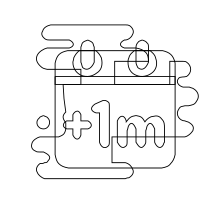

In [101]:
all_pickles = glob.glob("/home/mfeuerpfeil/master/deepsvg/dataset/icons_tensor/*.pkl")
my_pkl = random.choice(all_pickles)
pkl_id = int(my_pkl.split("/")[-1].replace(".pkl", ""))
print(df[df["id"] == pkl_id][["category", "subcategory"]])
mysvg = pkl_to_svg(my_pkl, fill=False)
mysvg.draw()

       category          subcategory
81360  security  property-protection


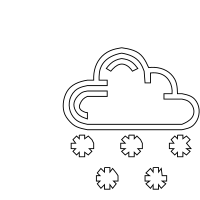

In [44]:
mysvg.copy().simplify_heuristic(epsilon=.1).draw()

In [ ]:
mysvg.save_svg("test.svg")

In [35]:
mysvg.svg_path_groups[1].path.filling

1

In [36]:
mysvg.group_overlapping_paths().svg_path_groups[1].path.filling

1

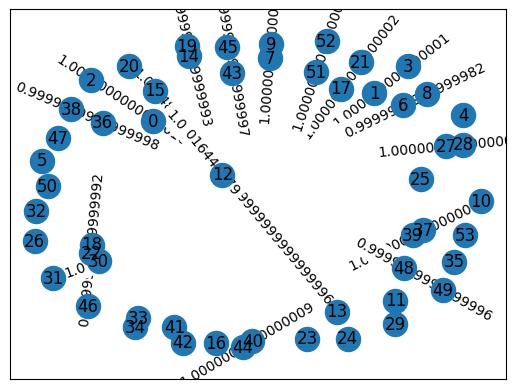

In [24]:
mysvg.overlap_graph(draw=True)

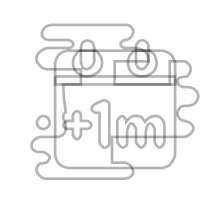

In [ ]:
mysvg.draw()

In [ ]:
svg_file = "/scratch2/moritz_data/openmoji_black_svg/emoji/E344.svg"

svg = SVG.load_svg(svg_file)
svg.fill_(False)
# svg.normalize()
svg.zoom(0.9)
svg.canonicalize()
svg = svg.simplify_heuristic()
svg.animate()

# dolphin

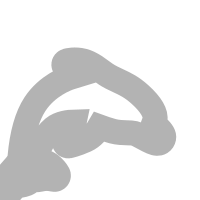

In [ ]:
from deepsvg.svglib.svg import SVG
from deepsvg.svglib.geom import Point, Angle

icon = SVG.load_svg("docs/imgs/dolphin.svg").normalize()
icon.simplify_heuristic()                                 # path simplifcation
icon.zoom(0.75).translate(Point(0, 5)).rotate(Angle(15))  # scale, translate, rotate
icon.draw()


In [ ]:
df["category"].value_counts()

transport            2731
business             2699
ecommerce            2675
user-interface       2635
food                 2580
messaging            2575
household            2537
editing              2511
arrows               2508
science              2481
travel               2462
logos                2457
finance              2445
mobile               2334
city                 2330
users                2328
healthcare           2298
data                 2171
files                2130
time-and-date        2130
animals              2129
free-icons           2118
cinema               2103
industry             2092
sports               2069
computer-hardware    2041
photo-video          1946
programming          1938
plants               1877
cultures             1857
maps                 1826
clothing             1809
network              1791
shopping             1789
holidays             1723
gaming               1671
weather              1595
security             1437
baby        

In [ ]:
pkl_path = "/home/mfeuerpfeil/master/deepsvg/dataset/icons_tensor/1351.pkl"
with open(pkl_path, "rb") as f:
    loaded = pickle.load(f)

In [ ]:
svg_file = '/scratch2/moritz_data/openmoji_black_svg/emoji/1F93E-1F3FF-200D-2640-FE0F.svg'

svg = SVG.load_svg(svg_file)
svg.fill_(False)
print(svg)
svg.normalize()
svg.zoom(0.9)
svg.canonicalize()
svg = svg.simplify_heuristic()

svg.save_svg("test.svg")

SVG[Bbox(0.0 0.0 72.0 72.0)](
	SVGPathGroup(SVGPath(M[P(0.0, 0.0), P(35.890499114990234, 37.422698974609375)] A[P(35.890499114990234, 37.422698974609375), Rad(90.55549621582031, 90.55549621582031), α(0.0), flag(0), flag(1), P(29.967498779296875, 44.287200927734375)] A[P(29.967498779296875, 44.287200927734375), Rad(2.967900037765503, 2.967900037765503), α(0.0), flag(0), flag(1), P(28.70509910583496, 44.98290252685547)] L[P(28.70509910583496, 44.98290252685547), P(18.922298431396484, 47.622901916503906)] A[P(18.922298431396484, 47.622901916503906), Rad(1.6983000040054321, 1.6983000040054321), α(0.0), flag(0), flag(1), P(16.825098037719727, 46.479000091552734)] A[P(16.825098037719727, 46.479000091552734), Rad(2.2778000831604004, 2.2778000831604004), α(0.0), flag(0), flag(1), P(18.350000381469727, 44.38159942626953)] C[P(18.350000381469727, 44.38159942626953), P(18.350000381469727, 44.38159942626953), P(23.938600540161133, 41.830299377441406), P(26.902099609375, 39.9724006652832)] A[P(26.9

AttributeError: 'SVGCircle' object has no attribute 'translate'

In [ ]:
from concurrent import futures
import os
from argparse import ArgumentParser
import logging
from tqdm import tqdm
import glob
import pandas as pd

from deepsvg.svglib.svg import SVG


def preprocess_svg(svg_file, output_folder, meta_data):
    filename = os.path.splitext(os.path.basename(svg_file))[0]

    svg = SVG.load_svg(svg_file)
    svg.fill_(False)
    svg.normalize()
    svg.zoom(0.9)
    svg.canonicalize()
    svg = svg.simplify_heuristic()

    svg.save_svg(os.path.join(output_folder, f"{filename}.svg"))

    len_groups = [path_group.total_len() for path_group in svg.svg_path_groups]

    meta_data[filename] = {
        "id": filename,
        "total_len": sum(len_groups),
        "nb_groups": len(len_groups),
        "len_groups": len_groups,
        "max_len_group": max(len_groups)
    }


def main(input_folder, output_folder, output_meta_file, workers):
    with futures.ThreadPoolExecutor(max_workers=workers) as executor:
        svg_files = glob.glob(os.path.join(input_folder, "*.svg"))
        print("SVG_FILES: ",svg_files)
        meta_data = {}

        with tqdm(total=len(svg_files)) as pbar:
            preprocess_requests = [executor.submit(preprocess_svg, svg_file, output_folder, meta_data)
                                    for svg_file in svg_files]

            for _ in futures.as_completed(preprocess_requests):
                pbar.update(1)

    df = pd.DataFrame(meta_data.values())
    df.to_csv(output_meta_file, index=False)

    logging.info("SVG Preprocessing complete.")


input_folder = "/scratch2/moritz_data/openmoji_black_svg/emoji"
output_folder = "/scratch2/moritz_data/openmoji_black_deepsvg_simplified/svgs"
output_metadata = "/scratch2/moritz_data/openmoji_black_deepsvg_simplified/svg_meta.csv"




# parser = ArgumentParser()
# parser.add_argument("--data_folder", default=os.path.join("dataset", "svgs"))
# parser.add_argument("--output_folder", default=os.path.join("dataset", "svgs_simplified"))
# parser.add_argument("--output_meta_file", default=os.path.join("dataset", "svg_meta.csv"))
# parser.add_argument("--workers", default=4, type=int)

# args = parser.parse_args()

if not os.path.exists(output_folder): 
    os.makedirs(output_folder)

main(input_folder = input_folder, output_folder = output_folder, output_meta_file = output_metadata, workers = 4)


SVG_FILES:  ['/scratch2/moritz_data/openmoji_black_svg/emoji/1F93E-1F3FF-200D-2640-FE0F.svg', '/scratch2/moritz_data/openmoji_black_svg/emoji/1F6F9.svg', '/scratch2/moritz_data/openmoji_black_svg/emoji/1F9DB-1F3FD-200D-2640-FE0F.svg', '/scratch2/moritz_data/openmoji_black_svg/emoji/1F3AE.svg', '/scratch2/moritz_data/openmoji_black_svg/emoji/1F469-1F3FE-200D-2764-FE0F-200D-1F469-1F3FC.svg', '/scratch2/moritz_data/openmoji_black_svg/emoji/1F469-1F3FC-200D-1F4BB.svg', '/scratch2/moritz_data/openmoji_black_svg/emoji/1F9CD-1F3FE-200D-2640-FE0F.svg', '/scratch2/moritz_data/openmoji_black_svg/emoji/1F481-1F3FD.svg', '/scratch2/moritz_data/openmoji_black_svg/emoji/1F46E-1F3FB-200D-2642-FE0F.svg', '/scratch2/moritz_data/openmoji_black_svg/emoji/1F1EC-1F1E9.svg', '/scratch2/moritz_data/openmoji_black_svg/emoji/1F468-1F3FE-200D-2708-FE0F.svg', '/scratch2/moritz_data/openmoji_black_svg/emoji/26F9-1F3FE.svg', '/scratch2/moritz_data/openmoji_black_svg/emoji/1F1E7-1F1F3.svg', '/scratch2/moritz_data/o

  0%|          | 0/4083 [00:00<?, ?it/s]

100%|██████████| 4083/4083 [01:37<00:00, 42.05it/s]


In [ ]:
from deepsvg.svglib.svg import SVG
from deepsvg.svglib.geom import Point, Angle

icon = SVG.load_svg("/scratch2/moritz_data/openmoji_black_svg/emoji/1F973.svg")#.normalize()
icon.simplify_heuristic()                                 # path simplifcation
icon.zoom(0.75).translate(Point(0, 5)).rotate(Angle(15))  # scale, translate, rotate
icon.draw()

NotImplementedError: 